In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score
from sklearn.svm import SVC

from utils.base_set import X_train, X_test, y_train, y_test
from utils.metrics import aucroc, auprc, accuracy

### Model Performance

accuracy: 0.7254901960784313
auprc: 0.631046785197249


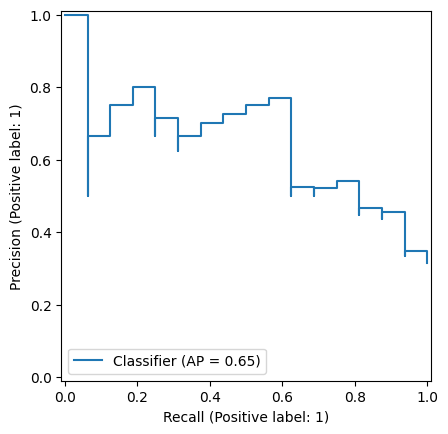

aucroc: 0.7928571428571428


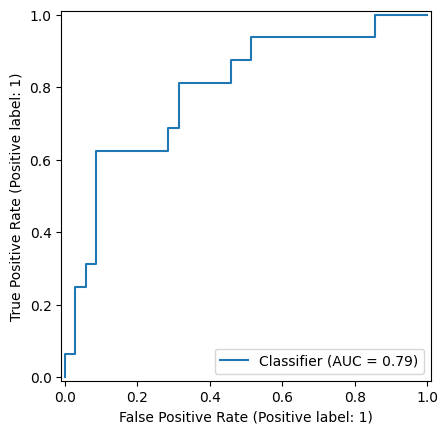

In [11]:
# TODO: Agregar modelo final
best_params = {'C': 0.9010665799255806, 'degree': 8, 'gamma': 'scale', 'kernel': 'rbf'}
model = SVC(probability=True, **best_params) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.decision_function(X_test)
mxp = [
    (accuracy, None, None),
    (auprc, PrecisionRecallDisplay, True), 
    (aucroc, RocCurveDisplay, True)
]

for metric, plotter, use_decision in mxp:
    y_score = y_prob if use_decision else y_pred
    print(f"{metric.__name__}: {metric(y_test, y_score)}")
    if plotter:
        plotter.from_predictions(y_test, y_score)
        plt.show()

### Competencia

In [12]:
# Find both thresholds for proba: 
# if (proba(X_held_out_i) > pTHRESH) -> prediction is correct and positive
# if (proba(X_held_out_i) < nTHRESH) -> prediction is correct and negative

probas = [proba_p for (proba_n, proba_p) in model.predict_proba(X_test)]
correctProbas = [pred_i == test_i for (pred_i, test_i) in zip(y_pred, y_test)]
pTHRESHvals = [proba for (proba, pred, correct) in zip(probas, y_pred, correctProbas) if (correct and pred == 1)]
nTHRESHvals = [proba for (proba, pred, correct) in zip(probas, y_pred, correctProbas) if (correct and pred == 0)]

# print(f'pTHRESH_min: ({min(pTHRESHvals)})')
# print(f'pTHRESH_max: ({max(pTHRESHvals)})')
# print(f'nTHRESH_min: ({min(nTHRESHvals)})')
# print(f'nTHRESH_max: ({max(nTHRESHvals)})')

# We take the averages as thresholds
pTHRESH = sum(pTHRESHvals) / len(pTHRESHvals)
nTHRESH = sum(nTHRESHvals) / len(nTHRESHvals)

print(f'(pTHRESH, nTHRESH) = ({pTHRESH}, {nTHRESH})')

(pTHRESH, nTHRESH) = (0.8026571905319824, 0.16412286404578513)


Bueno esto creo que termino siendo medio bastante flasheada, si lo corren van a ver que da bastante alto el aucorc (0.84), asi que quizas habria que revisar esto

In [13]:
X_held_out = pd.read_csv("../catedra/datos/X_held_out.csv", delimiter=',', encoding="utf-8").to_numpy()

y_pred = model.predict(X_held_out)
y_probas = model.predict_proba(X_held_out)[:,1]
# print(y_probas)
# print(len(y_probas))

y_held_out = []
print(f'{pTHRESH}, {nTHRESH}')
for pred, proba in zip(y_pred, y_probas):
    # print(f'{pred}, {proba}')
    if (pred == 1 and proba >= pTHRESH) or (pred == 0 and proba <= nTHRESH):
        y_held_out.append(pred)
    else:
        y_held_out.append(abs(pred-1))

prediction = roc_auc_score(y_held_out, model.decision_function(X_held_out))
print(prediction)

formated_aucroc = f'{prediction:.4f}'.split('.')[1]
file_path = f'./out/TEST_08_y_pred_held_out_{formated_aucroc}.csv'
pd.DataFrame({'output': y_probas}).to_csv(file_path, index=False)

0.8026571905319824, 0.16412286404578513
0.876231884057971
